## Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 7]
plt.style.use('seaborn-v0_8')

import seaborn as sns
sns.set(style="darkgrid")

import numpy as np 
import pandas as pd 

## Constants

In [2]:
PROJECT_ROOT = Path("__file__").resolve().parents[1]

DATA_DPATH = PROJECT_ROOT / "data"
assert DATA_DPATH.exists()

## Data Loading 

In [5]:
df_fpath = DATA_DPATH / "source_data" / "product.csv"
df_raw = pd.read_csv(df_fpath, index_col=0)
df_raw.shape

(118080, 2)

In [6]:
df_raw.head()

,timestamp,quantity
0,2018-01-01 00:00:00+00:00,5.357727
1,2018-01-01 00:10:00+00:00,5.822360
2,2018-01-01 00:20:00+00:00,5.279409
3,2018-01-01 00:30:00+00:00,4.648054
4,2018-01-01 00:40:00+00:00,4.684632


In [7]:
df = df_raw.copy() 
df["timestamp"] = pd.to_datetime(df["timestamp"])

df.head()

,timestamp,quantity
0,2018-01-01 00:00:00+00:00,5.357727
1,2018-01-01 00:10:00+00:00,5.822360
2,2018-01-01 00:20:00+00:00,5.279409
3,2018-01-01 00:30:00+00:00,4.648054
4,2018-01-01 00:40:00+00:00,4.684632


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118080 entries, 0 to 118079
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   timestamp  118080 non-null  datetime64[ns, UTC]
 1   quantity   94750 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 2.7 MB


## Duplicates

In [9]:
df[df.duplicated()]

,timestamp,quantity


## Missing Values

In [10]:
df.isna().sum()

timestamp        0
quantity     23330
dtype: int64

In [11]:
df.isna().sum() / len(df)

timestamp    0.000000
quantity     0.197578
dtype: float64

In [12]:
df = df.dropna()
df.shape

(94750, 2)

## Date Limits

In [13]:
df["timestamp"].describe()

/tmp/ipykernel_207031/52595715.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["timestamp"].describe()


count                         94750
unique                        94750
top       2018-01-01 00:00:00+00:00
freq                              1
first     2018-01-01 00:00:00+00:00
last      2020-03-30 23:50:00+00:00
Name: timestamp, dtype: object

## Target

In [14]:
df["quantity"].describe()

count    94750.000000
mean       621.129616
std        609.222871
min          0.000000
25%         79.642258
50%        402.654893
75%       1074.591780
max       1779.032433
Name: quantity, dtype: float64

In [15]:
np.percentile(df["quantity"], 95), np.percentile(df["quantity"], 99)

(1720.2045748070134, 1725.7598474849153)

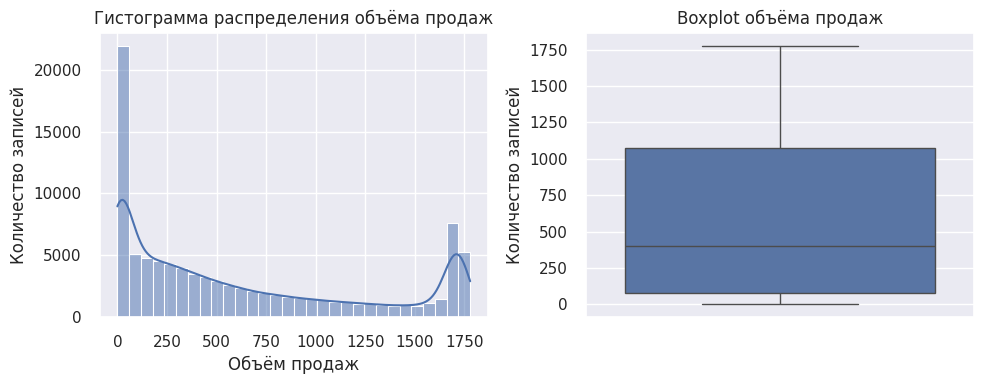

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(
    df, 
    x="quantity",
    kde=True, 
    bins=30, 
    log_scale=False,
    ax=axs[0]
)
axs[0].set_xlabel("Объём продаж")
axs[0].set_ylabel("Количество записей")
axs[0].set_title("Гистограмма распределения объёма продаж")

sns.boxplot(df["quantity"], ax=axs[1])
axs[1].set_ylabel("Количество записей")
axs[1].set_title("Boxplot объёма продаж")

plt.tight_layout()
plt.show()

## Viz - Raw Timestamps

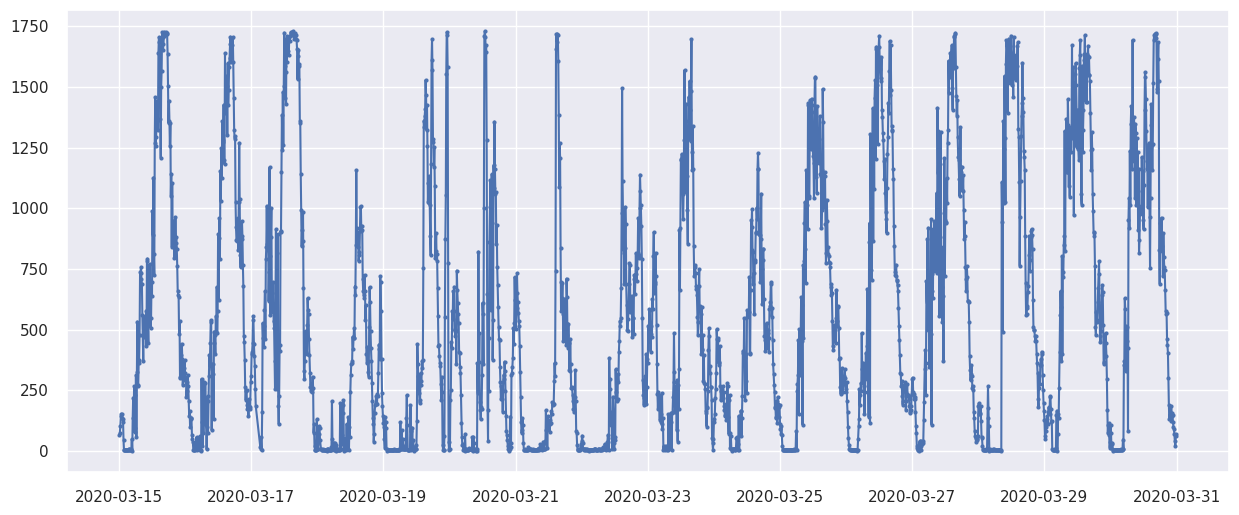

In [18]:
plot_data = df.copy()
plot_data = plot_data.sort_values("timestamp")
plot_data = plot_data[plot_data["timestamp"] > "2020-03-15"]

plt.figure(figsize=(15, 6))
plt.plot("timestamp", "quantity", ".-", data=plot_data)
plt.show()

## Viz - Resampled by Day

In [19]:
resampled_df = df.resample("1D", on="timestamp").mean().reset_index()
resampled_df["timestamp"] = resampled_df["timestamp"].dt.strftime("%Y-%m-%d")
resampled_df.shape

(820, 2)

In [20]:
resampled_df.head()

,timestamp,quantity
0,2018-01-01,196.335144
1,2018-01-02,342.874069
2,2018-01-03,321.301506
3,2018-01-04,362.192585
4,2018-01-05,239.929000


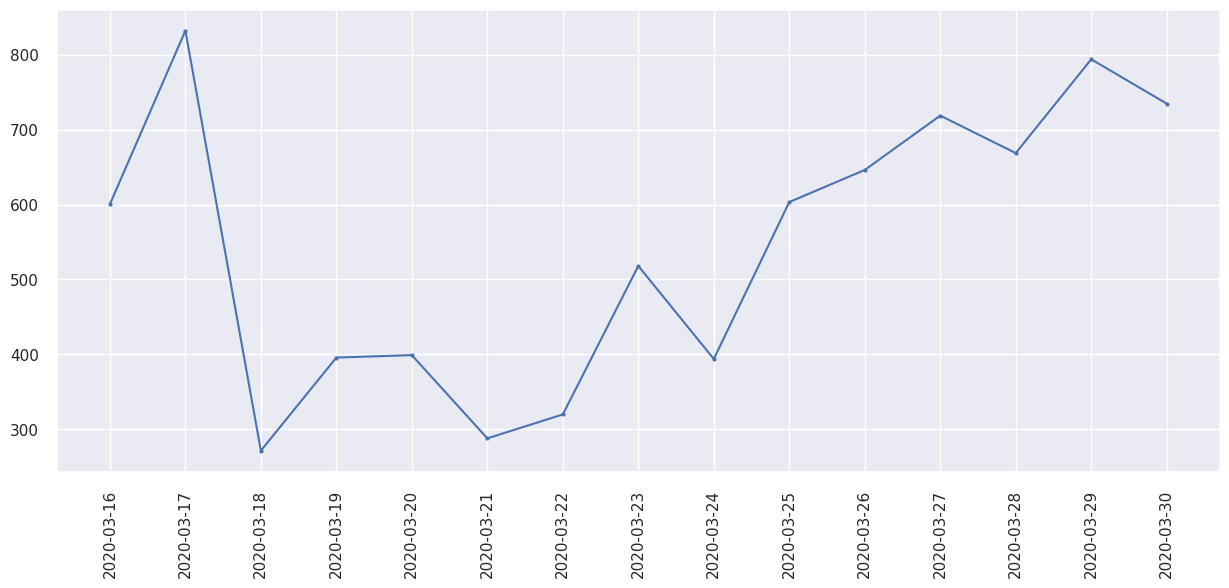

In [21]:
plot_data = resampled_df.copy()
plot_data = plot_data.sort_values("timestamp")

plot_data = plot_data[plot_data["timestamp"] > "2020-03-15"]

plt.figure(figsize=(15, 6))
plt.plot("timestamp", "quantity", ".-", data=plot_data)
plt.xticks(rotation=90)

plt.show()

In [22]:
output_dpath = DATA_DPATH / "preprocessed_data"
output_dpath.mkdir(parents=True, exist_ok=True)

resampled_df.to_csv(output_dpath / "resampled_product.csv")